In [1]:
from aicsimageio import AICSImage
import napari
from napari_aicsimageio import core
from pathlib import Path

In [2]:
import stardist_napari

In [2]:
import seaborn as sns
import anndata as ad
import matplotlib.pyplot as plt
import scanpy as sc

In [55]:
import SimpleITK as sitk
from PIL import Image
from scipy.optimize import minimize
import cv2
import numpy as np 

In [4]:
def transform_point(transform, point):
    transformed_point = transform.TransformPoint(point, )
    return transformed_point

In [5]:
def inverse_transform_point(xform, p):
    """
    Returns the inverse-transform of a point.
    """

    def fun(x):
        return np.linalg.norm(xform.TransformPoint(x) - p)

    p = np.array(p)
    res = minimize(fun, p, method='Powell')
    return res.x, res.success

In [6]:
def rotate_contour(contour_points, angle, center):
    new_ct_pts = np.zeros_like(contour_points)
    for index, points in enumerate(contour_points):
        x, y = points
        new_y = (y - center[1])*np.cos(np.pi*angle/180) + (x - center[0])*np.sin(np.pi*angle/180) + center[1]
        new_x = -(y- center[1])*np.sin(np.pi*angle/180) + (x- center[0])*np.cos(np.pi*angle/180) + center[0]
        new_y = new_y - (center[1] -  center[0])
        new_x = new_x +  (center[1] -  center[0])
        new_ct_pts[index] = np.array([np.abs(new_x), np.abs(new_y)])
    return new_ct_pts

In [37]:
def get_files_in_directory(directory, postfix=""):
    """ list all the files with postfix in the directory and return the sorted list """
    import os
    fileNames = [s for s in os.listdir(directory) if not os.path.isdir(os.path.join(directory, s))]
    if not postfix or postfix == "":
        return sorted(str(directory.joinpath(fileNames)))
    else:
        return sorted([str(directory.joinpath(s)) for s in fileNames if s.lower().endswith(postfix)])

In [ ]:
adata = sc.read_h5ad(demo_path.joinpath('Anndata/subset_protien_data_4_patients.h5ad'))
print(f'Found {len(adata)} cells')


In [27]:
# put_Path = Path('/QRISdata/Q1851/Minh/Stanford/COAD_56_output/2607_measurement/Scanpy')
demo_path = Path('/Volumes/BiomedML/Projects/MOSAP/demo_data/')


In [39]:
path_to_images = demo_path.joinpath('HE')
list_imgs = get_files_in_directory(path_to_images, 'png')
list_imgs

['/Volumes/BiomedML/Projects/MOSAP/demo_data/HE/CR-014 (1, 26605, 81996, 3571, 3811).png',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/HE/CR-014 (1, 29022, 88464, 2289, 2978).png',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/HE/CR-014 (1, 30362, 72675, 3005, 2639).png',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/HE/CR-014 (1, 35531, 80237, 2611, 2482).png',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/HE/CR-014 (1, 37074, 86219, 2801, 4087).png',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/HE/CR-020 (1, 57593, 155669, 3484, 3427).png',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/HE/CR-034 (1, 43504, 59165, 3623, 4081).png',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/HE/CR-034 (1, 43615, 63353, 3797, 4114).png',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/HE/CR-034 (1, 54166, 68143, 3024, 3590).png',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/HE/CR-048 (1, 35868, 115815, 2096, 1686).png',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/HE/CR-048 (1, 38045, 114039, 3996, 4202).pn

In [16]:
napari.gui_qt()


Found model '2D_versatile_he' for 'StarDist2D'.


2022-12-02 12:09:38.562937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.
1/1 [==============================] - 6s 6s/step


In [13]:
viewer = napari.Viewer()

In [14]:
# image = AICSImage(path_to_images)
for image in list_imgs[3:5]: 
    viewer.open(str(image), plugin="napari-aicsimageio")
                    

In [15]:
viewer.layers

[<Image layer 'CR-014 (1, 35531, 80237, 2611, 2482)' at 0x7ff2234953a0>, <Image layer 'CR-014 (1, 37074, 86219, 2801, 4087)' at 0x7ff222514340>]

2022-12-02 11:54:52.991191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


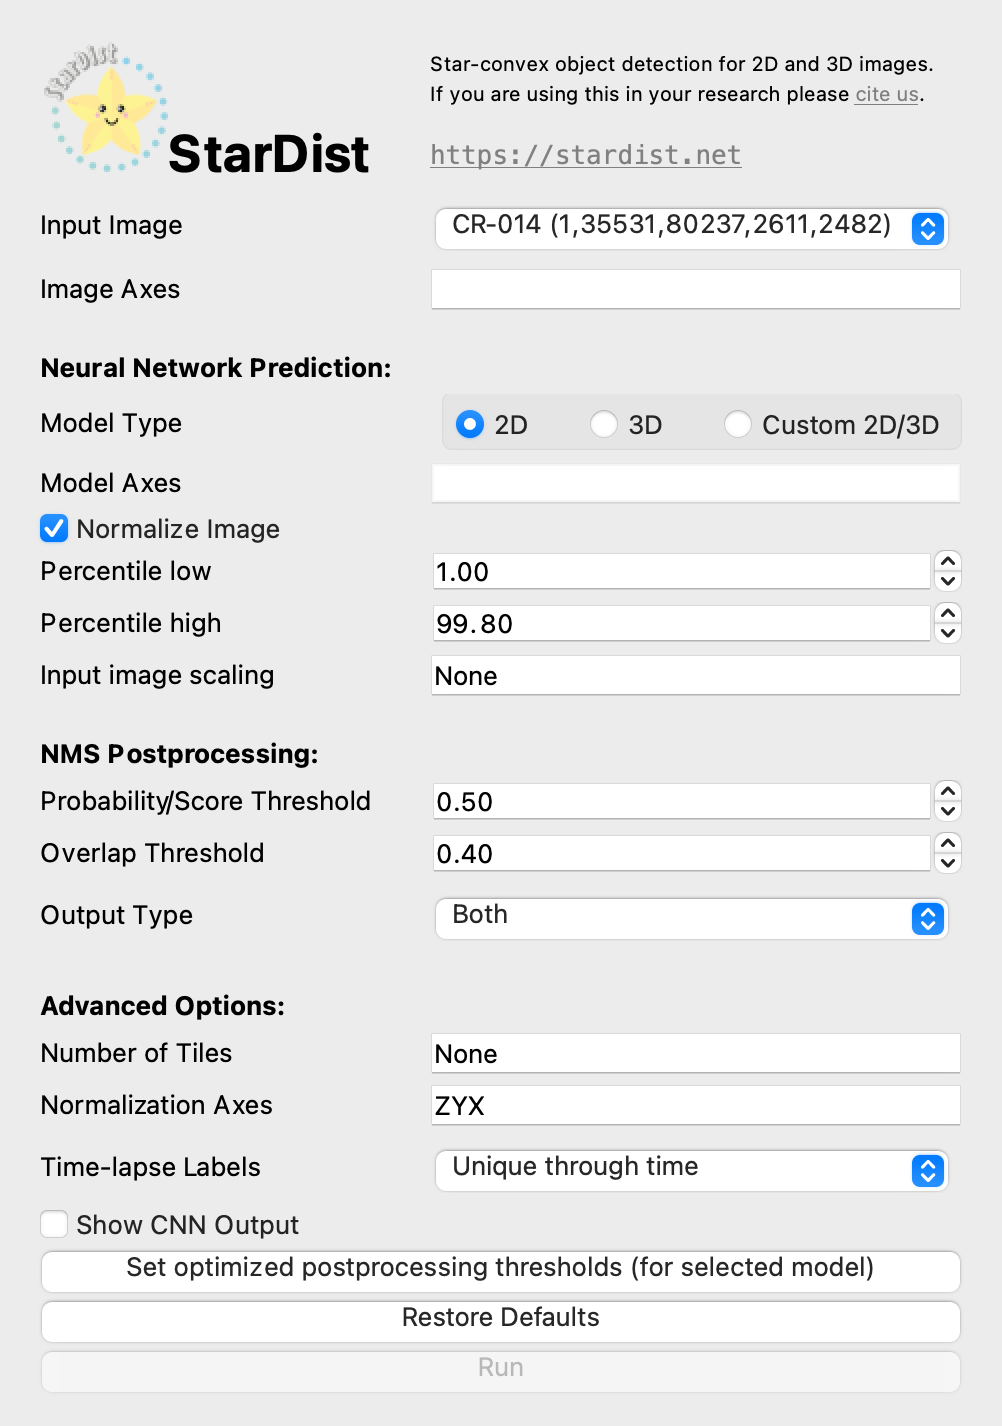

In [37]:
stardist_napari.make_dock_widget()

In [46]:
list_tfms

['/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 1 (1, 29022, 88464, 2289, 2978)_affine.tfm',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 1 (1, 29022, 88464, 2289, 2978)_bspline.tfm',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 2 (1, 26605, 81996, 3571, 3811)_affine.tfm',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 2 (1, 26605, 81996, 3571, 3811)_bspline.tfm',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 3 (1, 30362, 72675, 3005, 2639)_affine.tfm',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 3 (1, 30362, 72675, 3005, 2639)_bspline.tfm',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 4 (1, 37074, 86219, 2801, 4087)_affine.tfm',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 4 (1, 37074, 86219, 2801, 4087)_bspline.tfm',
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 5 (1, 35531, 80237, 2611, 2482)_affine.tfm',
 '/Volumes/BiomedML/Projects/MOSAP/demo_da

## IMC data 

In [50]:
Transformer_Path = Path('/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs')
list_tfms = get_files_in_directory(Transformer_Path, 'tfm')
he2transformer = dict()
for index, he_file in enumerate(list_imgs):
    he2transformer[he_file] = {'Affine': list_tfms[index][:-4]+'_affine.tfm', 'Bspline': list_tfms[index][:-4]+'_bspline.tfm'}
# he2transformer
# list_tfms

{'/Volumes/BiomedML/Projects/MOSAP/demo_data/HE/CR-014 (1, 26605, 81996, 3571, 3811).png': {'Affine': '/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 1 (1, 29022, 88464, 2289, 2978)_affine_affine.tfm',
  'Bspline': '/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 1 (1, 29022, 88464, 2289, 2978)_affine_bspline.tfm'},
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/HE/CR-014 (1, 29022, 88464, 2289, 2978).png': {'Affine': '/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 1 (1, 29022, 88464, 2289, 2978)_bspline_affine.tfm',
  'Bspline': '/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 1 (1, 29022, 88464, 2289, 2978)_bspline_bspline.tfm'},
 '/Volumes/BiomedML/Projects/MOSAP/demo_data/HE/CR-014 (1, 30362, 72675, 3005, 2639).png': {'Affine': '/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 2 (1, 26605, 81996, 3571, 3811)_affine_affine.tfm',
  'Bspline': '/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 2 (1, 26605, 81996, 3571, 381

In [42]:
# he2transformer = {'CR-014 ROI 1 (1, 29022, 88464, 2289, 2978).png': {'Affine': 'CR-014 ROI 1 (1, 29022, 88464, 2289, 2978)_affine.tfm',
#   'Bspline': 'CR-014 ROI 1 (1, 29022, 88464, 2289, 2978)_bspline.tfm'},
#  'CR-014 ROI 2 (1, 26605, 81996, 3571, 3811).png': {'Affine': 'CR-014 ROI 2 (1, 26605, 81996, 3571, 3811)_affine.tfm',
#   'Bspline': 'CR-014 ROI 2 (1, 26605, 81996, 3571, 3811)_bspline.tfm'},
#  'CR-014 ROI 3 (1, 30362, 72675, 3005, 2639).png': {'Affine': 'CR-014 ROI 3 (1, 30362, 72675, 3005, 2639)_affine.tfm',
#   'Bspline': 'CR-014 ROI 3 (1, 30362, 72675, 3005, 2639)_bspline.tfm'},
#  'CR-014 ROI 4 (1, 37074, 86219, 2801, 4087).png': {'Affine': 'CR-014 ROI 4 (1, 37074, 86219, 2801, 4087)_affine.tfm',
#   'Bspline': 'CR-014 ROI 4 (1, 37074, 86219, 2801, 4087)_bspline.tfm'},
#  'CR-014 ROI 5 (1, 35531, 80237, 2611, 2482).png': {'Affine': 'CR-014 ROI 5 (1, 35531, 80237, 2611, 2482)_affine.tfm',
#   'Bspline': 'CR-014 ROI 5 (1, 35531, 80237, 2611, 2482)_bspline.tfm'},
#  'CR-020 ROI 1 (1, 57593, 155669, 3484, 3427).png': {'Affine': 'CR-020 ROI 1 (1, 57593, 155669, 3484, 3427)_affine.tfm',
#   'Bspline': 'CR-020 ROI 1 (1, 57593, 155669, 3484, 3427)_bspline.tfm'},
#  'CR-034 ROI 1 (1, 43504, 59165, 3623, 4081).png': {'Affine': 'CR-034 ROI 1 (1, 43504, 59165, 3623, 4081)_affine.tfm',
#   'Bspline': 'CR-034 ROI 1 (1, 43504, 59165, 3623, 4081)_bspline.tfm'},
#  'CR-034 ROI 2 (1, 43615, 63353, 3797, 4114).png': {'Affine': 'CR-034 ROI 2 (1, 43615, 63353, 3797, 4114)_affine.tfm',
#   'Bspline': 'CR-034 ROI 2 (1, 43615, 63353, 3797, 4114)_bspline.tfm'},
#  'CR-034 ROI 3 (1, 54166, 68143, 3024, 3590).png': {'Affine': 'CR-034 ROI 3 (1, 54166, 68143, 3024, 3590)_affine.tfm',
#   'Bspline': 'CR-034 ROI 3 (1, 54166, 68143, 3024, 3590)_bspline.tfm'},
#  'CR-048 ROI 1 (1, 38045, 114039, 3996, 4202).png': {'Affine': 'CR-048 ROI 1 (1, 38045, 114039, 3996, 4202)_affine.tfm',
#   'Bspline': 'CR-048 ROI 1 (1, 38045, 114039, 3996, 4202)_bspline.tfm'},
#  'CR-048 ROI 2 (1, 35868, 115815, 2096, 1686).png': {'Affine': 'CR-048 ROI 2 (1, 35868, 115815, 2096, 1686)_affine.tfm',
#   'Bspline': 'CR-048 ROI 2 (1, 35868, 115815, 2096, 1686)_bspline.tfm'}}

In [9]:
demo_path = Path('/Volumes/BiomedML/Projects/MOSAP/demo_data/')
adata = sc.read_h5ad(demo_path.joinpath('Anndata/subset_protien_data_4_patients.h5ad'))
print(f'Found {len(adata)} cells')



Found 43455 cells


In [11]:
all_data_cr014 = adata[(adata.obs['Metadata_acname'] == 'CR014')] # & (all_data.obs['Metadata_acid'] == 1)]
all_data_cr014

View of AnnData object with n_obs × n_vars = 14280 × 15
    obs: 'ImageNumber', 'ObjectNumber', 'AreaShape_Area', 'AreaShape_BoundingBoxArea', 'AreaShape_BoundingBoxMaximum_X', 'AreaShape_BoundingBoxMaximum_Y', 'AreaShape_BoundingBoxMinimum_X', 'AreaShape_BoundingBoxMinimum_Y', 'AreaShape_Center_X', 'AreaShape_Center_Y', 'AreaShape_Compactness', 'AreaShape_ConvexArea', 'AreaShape_Eccentricity', 'AreaShape_EquivalentDiameter', 'AreaShape_EulerNumber', 'AreaShape_Extent', 'AreaShape_FormFactor', 'AreaShape_MajorAxisLength', 'AreaShape_MaxFeretDiameter', 'AreaShape_MaximumRadius', 'AreaShape_MeanRadius', 'AreaShape_MedianRadius', 'AreaShape_MinFeretDiameter', 'AreaShape_MinorAxisLength', 'AreaShape_Orientation', 'AreaShape_Perimeter', 'AreaShape_Solidity', 'Count_cell', 'FileName_FullStack', 'FileName_cellmask', 'Metadata_description', 'Metadata_slideid', 'Metadata_acname', 'Metadata_acid', 'batch', 'alt_identifier', 'Metadata', 'image_index', 'n_genes', 'leiden', 'cell_type', 'ROI_index'

In [12]:
all_data_cr014.obs

,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,AreaShape_Center_X,AreaShape_Center_Y,...,Metadata_acname,Metadata_acid,batch,alt_identifier,Metadata,image_index,n_genes,leiden,cell_type,ROI_index
102_103_1,103,1,186,294,168,21,154,0,160.053763,8.155914,...,CR014,1,Cancer,CR014,Cancer CR014_s0_a1_ac_full.tiff,102,15,10,CD4 T cell,103
102_103_2,103,2,93,143,181,11,168,0,174.365591,3.494624,...,CR014,1,Cancer,CR014,Cancer CR014_s0_a1_ac_full.tiff,102,15,8,Stromal,103
102_103_5,103,5,101,143,537,13,526,0,531.782178,5.009901,...,CR014,1,Cancer,CR014,Cancer CR014_s0_a1_ac_full.tiff,102,15,6,Macrophages,103
102_103_8,103,8,113,182,651,19,637,6,643.274336,13.353982,...,CR014,1,Cancer,CR014,Cancer CR014_s0_a1_ac_full.tiff,102,15,13,Stromal,103
102_103_9,103,9,33,48,665,14,659,6,660.939394,9.212121,...,CR014,1,Cancer,CR014,Cancer CR014_s0_a1_ac_full.tiff,102,15,13,Stromal,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_108_6927,108,6927,19,48,456,998,448,992,452.157895,995.315789,...,CR014,6,Cancer,CR014,Cancer CR014_s0_a6_ac_full.tiff,107,12,7,Stromal,108
107_108_6928,108,6928,27,40,521,997,513,992,516.592593,994.222222,...,CR014,6,Cancer,CR014,Cancer CR014_s0_a6_ac_full.tiff,107,14,5,Stromal,108
107_108_6929,108,6929,54,72,681,1000,672,992,676.796296,996.185185,...,CR014,6,Cancer,CR014,Cancer CR014_s0_a6_ac_full.tiff,107,15,0,Proliferative Tumor,108
107_108_6931,108,6931,45,64,773,1000,765,992,768.355556,994.977778,...,CR014,6,Cancer,CR014,Cancer CR014_s0_a6_ac_full.tiff,107,14,8,Stromal,108


In [22]:
current_roi = all_data_cr014[all_data_cr014.obs.Metadata_acid == 5]
current_roi

View of AnnData object with n_obs × n_vars = 3037 × 15
    obs: 'ImageNumber', 'ObjectNumber', 'AreaShape_Area', 'AreaShape_BoundingBoxArea', 'AreaShape_BoundingBoxMaximum_X', 'AreaShape_BoundingBoxMaximum_Y', 'AreaShape_BoundingBoxMinimum_X', 'AreaShape_BoundingBoxMinimum_Y', 'AreaShape_Center_X', 'AreaShape_Center_Y', 'AreaShape_Compactness', 'AreaShape_ConvexArea', 'AreaShape_Eccentricity', 'AreaShape_EquivalentDiameter', 'AreaShape_EulerNumber', 'AreaShape_Extent', 'AreaShape_FormFactor', 'AreaShape_MajorAxisLength', 'AreaShape_MaxFeretDiameter', 'AreaShape_MaximumRadius', 'AreaShape_MeanRadius', 'AreaShape_MedianRadius', 'AreaShape_MinFeretDiameter', 'AreaShape_MinorAxisLength', 'AreaShape_Orientation', 'AreaShape_Perimeter', 'AreaShape_Solidity', 'Count_cell', 'FileName_FullStack', 'FileName_cellmask', 'Metadata_description', 'Metadata_slideid', 'Metadata_acname', 'Metadata_acid', 'batch', 'alt_identifier', 'Metadata', 'image_index', 'n_genes', 'leiden', 'cell_type', 'ROI_index'


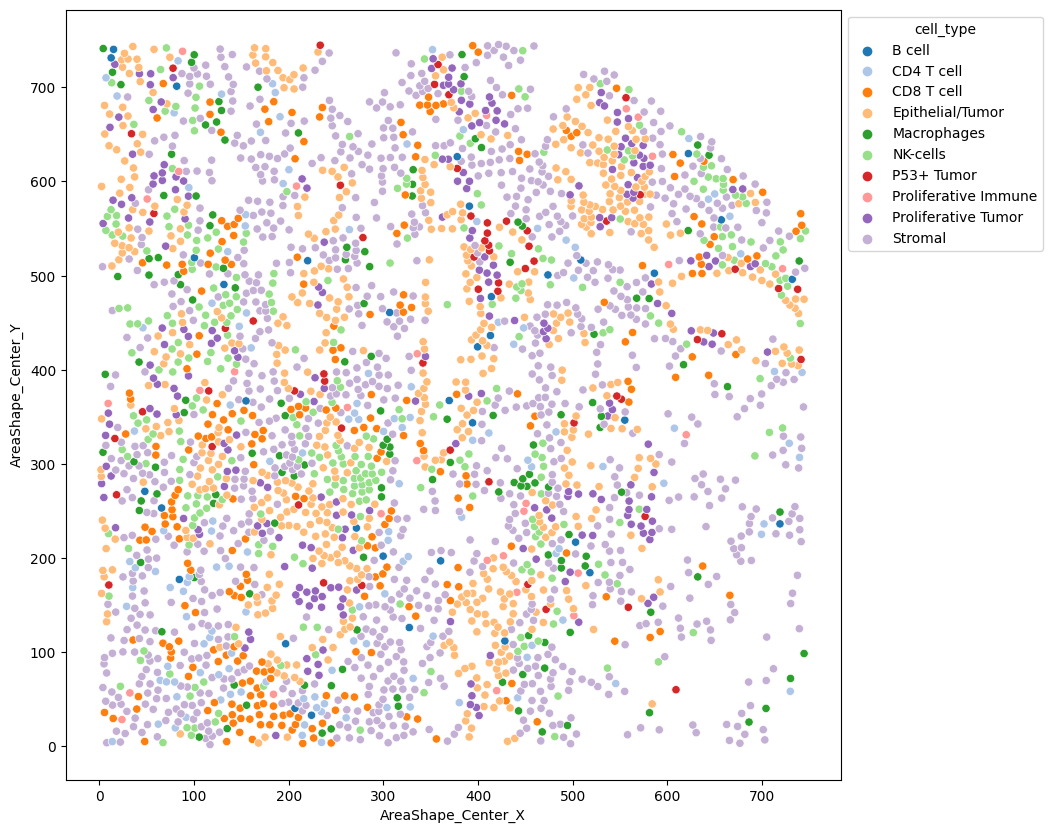

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.scatterplot(x=current_roi.obs['AreaShape_Center_X'], 
                y=current_roi.obs['AreaShape_Center_Y'], 
                hue=current_roi.obs['cell_type'], palette='tab20',ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [51]:
# he2transformer

In [44]:
# list_roi_cr014

NameError: name 'list_roi_cr014' is not defined

In [53]:
affine_transform = sitk.ReadTransform('/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 5 (1, 35531, 80237, 2611, 2482)_affine.tfm')

bspline_transform = sitk.ReadTransform('/Volumes/BiomedML/Projects/MOSAP/demo_data/TFMs/CR-014 ROI 5 (1, 35531, 80237, 2611, 2482)_bspline.tfm')


In [57]:
all_transformed_ox = list()
all_transformed_oy = list()
all_transformed_celltype = list()
#cell mask is here
for index, cell in current_roi.obs.iterrows():
    ox, oy = cell['AreaShape_Center_X'], cell['AreaShape_Center_Y']
    new_ox = ox* 2482/750
    new_oy = oy* 2611/750
    trans_coord_1, trans_state1 = inverse_transform_point(affine_transform, (new_ox, new_oy))
    trans_coord_2, trans_state2 = inverse_transform_point(bspline_transform, trans_coord_1)
    all_transformed_ox.append(trans_coord_2[0])
    all_transformed_oy.append(trans_coord_2[1])